In [ ]:
# 1. Import libraries yang dibutuhkan
import pandas as pd  # Untuk pengolahan data
import numpy as np  # Untuk operasi array numerik
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi training dan testing
from sklearn.linear_model import LinearRegression  # Model regresi linear
from sklearn.preprocessing import PolynomialFeatures  # Untuk membuat fitur polynomial
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Metrik evaluasi
import matplotlib.pyplot as plt  # Untuk visualisasi data

In [ ]:
# 2. Load dataset FinancialMarket.csv
df = pd.read_csv('/content/FinancialMarket.csv')

In [ ]:
# 3. Melihat 5 baris pertama dari dataset untuk memahami struktur data
print(df.head())

         x  combined_data
0  0.00000       0.003073
1  0.01001       0.033492
2  0.02002      -0.027269
3  0.03003       0.176319
4  0.04004      -0.006027


In [ ]:
# 4. Preprocessing: Memilih kolom fitur (X) dan target (y)
# Asumsikan kolom pertama adalah fitur, dan kolom kedua adalah target
X = df.iloc[:, :-1].values  # Mengambil semua kolom kecuali kolom terakhir sebagai fitur
y = df.iloc[:, -1].values   # Kolom terakhir sebagai target (misalnya harga pasar atau return)

In [ ]:
# 5. Membagi data menjadi data training (70%) dan testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 6. Membuat model Regresi Linear Biasa
linear_model = LinearRegression()  # Inisiasi model
linear_model.fit(X_train, y_train)  # Melatih model pada data training

LinearRegression()

In [ ]:
# 7. Prediksi menggunakan model regresi linear pada data testing
y_pred_linear = linear_model.predict(X_test)

In [ ]:
# 8. Evaluasi model Regresi Linear Biasa
mse_linear = mean_squared_error(y_test, y_pred_linear)  # Mean Squared Error
rmse_linear = np.sqrt(mse_linear)  # Root Mean Squared Error
r2_linear = r2_score(y_test, y_pred_linear)  # R-Squared (koefisien determinasi)

In [ ]:
# 9. Menampilkan hasil evaluasi dari model Regresi Linear Biasa
print("Evaluasi Regresi Linear Biasa:")
print(f"MSE: {mse_linear:.4f}")
print(f"RMSE: {rmse_linear:.4f}")
print(f"R-Squared: {r2_linear:.4f}\n")

Evaluasi Regresi Linear Biasa:
MSE: 10.3005
RMSE: 3.2094
R-Squared: 0.6571



In [ ]:
# 10. Membuat model Polynomial Regression (Regresi dengan basis fungsi)
# Misalnya kita menggunakan polynomial degree 2 (kuadrat)
poly = PolynomialFeatures(degree=2)  # Menyusun fitur polynomial dengan derajat 2
X_train_poly = poly.fit_transform(X_train)  # Mengubah fitur training menjadi polynomial
X_test_poly = poly.transform(X_test)  # Mengubah fitur testing menjadi polynomial

In [ ]:
# 11. Membuat model Regresi Linear untuk data polynomial
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)  # Melatih model pada data training

LinearRegression()

In [ ]:
# 12. Prediksi menggunakan model polynomial regression
y_pred_poly = poly_model.predict(X_test_poly)

In [ ]:
# 13. Evaluasi model Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)  # Mean Squared Error
rmse_poly = np.sqrt(mse_poly)  # Root Mean Squared Error
r2_poly = r2_score(y_test, y_pred_poly)  # R-Squared

In [ ]:
# 14. Menampilkan hasil evaluasi dari model Polynomial Regression
print("Evaluasi Polynomial Regression (Degree=2):")
print(f"MSE: {mse_poly:.4f}")
print(f"RMSE: {rmse_poly:.4f}")
print(f"R-Squared: {r2_poly:.4f}")

Evaluasi Polynomial Regression (Degree=2):
MSE: 1.4395
RMSE: 1.1998
R-Squared: 0.9521


In [ ]:
# 15. Visualisasi hasil prediksi kedua model
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

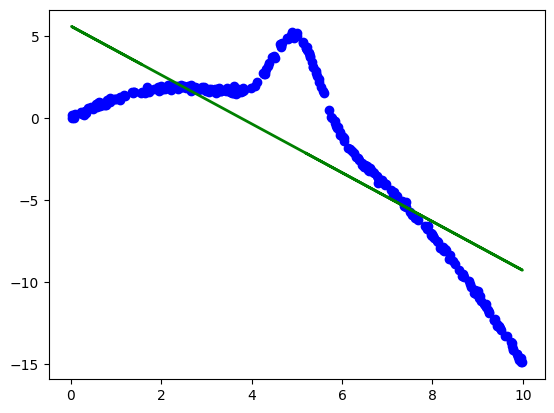

In [ ]:
# Plot hasil prediksi dari Regresi Linear Biasa
plt.scatter(X_test, y_test, color='blue', label='Data Asli')
plt.plot(X_test, y_pred_linear, color='green', label='Regresi Linear', linewidth=2)

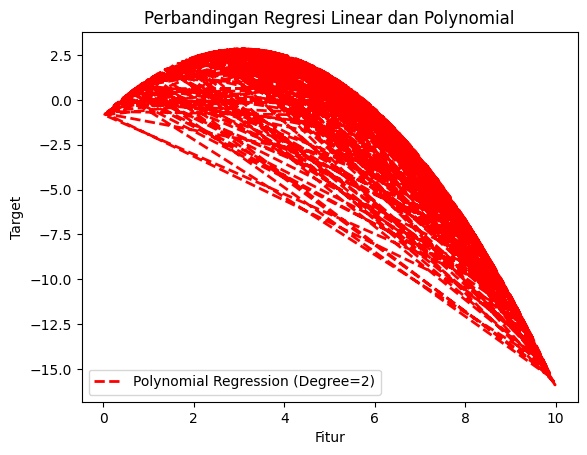

In [ ]:
# Plot hasil prediksi dari Polynomial Regression
plt.plot(X_test, y_pred_poly, color='red', linestyle='--', label='Polynomial Regression (Degree=2)', linewidth=2)

plt.title('Perbandingan Regresi Linear dan Polynomial')
plt.xlabel('Fitur')
plt.ylabel('Target')
plt.legend()
plt.show()